# Pymaceuticals Inc.
---

### Analysis

- The gender distribution for the mice were almost equal with 51% male and 49% female.
- Mice treated wiht Infubinol and Ceftamin have a larger tumor volume than Capomulin and Ramicane.
- Between days 20 and 30 mouse l509 treated with Capomulin saw the largest decrease in tumor size.
 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.DataFrame.merge(study_results,mouse_metadata)

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [114]:
# Checking the number of mice.
number_of_mice = len(combined_df['Mouse ID'].unique())
number_of_mice

249

In [115]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [116]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_df.loc[combined_df["Mouse ID"].isin(duplicate_mice)]

duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [117]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[~combined_df["Mouse ID"].isin(duplicate_mice)]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [118]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_df['Mouse ID'].unique())
number_of_mice_clean

248

## Summary Statistics

In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_regimen_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_regimen_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_regimen_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_regimen_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_mean,
    "Median Tumor Volume": drug_regimen_median,
    "Tumor Volume Variance": drug_regimen_variance,
    "Tumor Volume Std. Dev.": drug_regimen_std,
    "Tumor Volume Std. Err.": drug_regimen_sem})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [121]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

summary_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

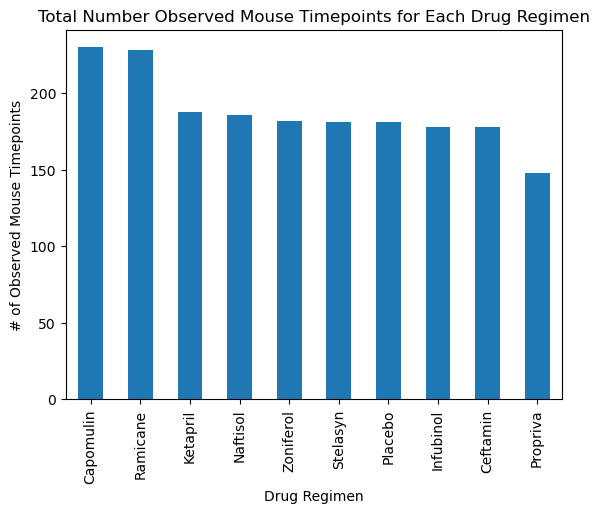

In [122]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_count = clean_df["Drug Regimen"].value_counts()
drug_regimen_count.plot(kind="bar",title="Total Number Observed Mouse Timepoints for Each Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


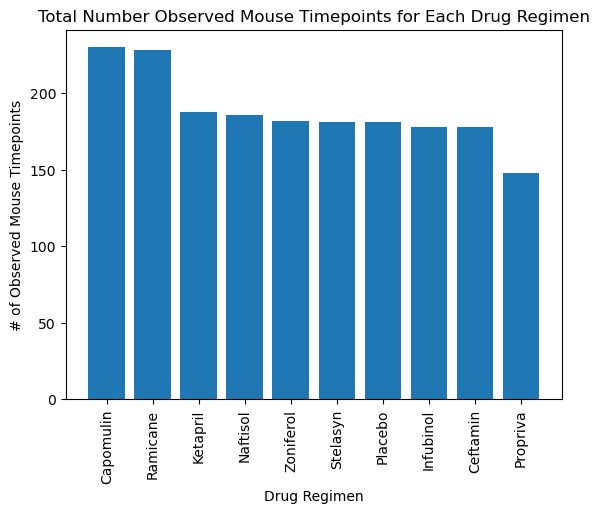

In [123]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(drug_regimen_count.index,drug_regimen_count)   
plt.xticks(rotation=90)
plt.title("Total Number Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


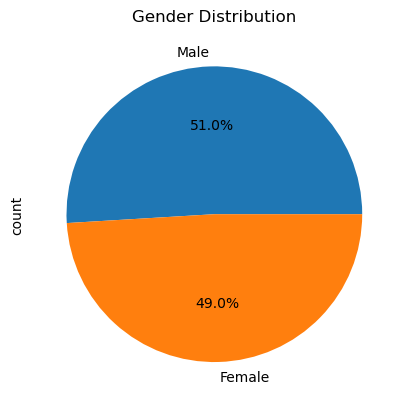

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = clean_df["Sex"].value_counts()
gender_distribution.plot.pie(autopct="%1.1f%%",title="Gender Distribution")
plt.show()

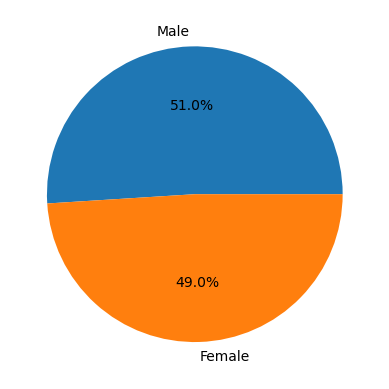

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [.51, .49]
plt.pie(sizes,labels=labels,autopct="%1.1f%%",)
plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = last_timepoint[["Mouse ID","Timepoint"]].merge(clean_df,on=["Mouse ID","Timepoint"],how="left")


In [133]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
       
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
 
    # add subset 
    #tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume<lower_bound) | (tumor_volume>upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


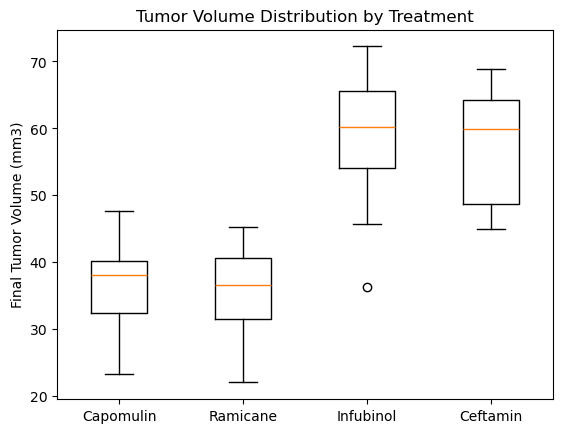

In [134]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"],
             final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"],
             final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"],
             final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]],labels=treatments)
plt.title("Tumor Volume Distribution by Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

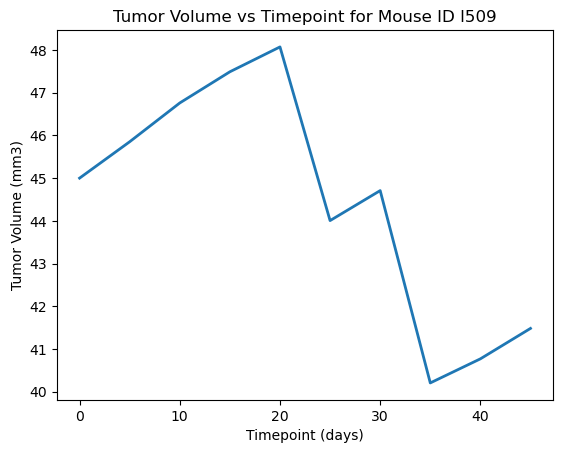

In [135]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse = clean_df.loc[clean_df['Drug Regimen']=="Capomulin"]
line_df = clean_df.loc[clean_df["Mouse ID"]=="l509"]
line_df.head()
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.plot(x_axis,y_axis,linewidth=2, markersize=12)
plt.title("Tumor Volume vs Timepoint for Mouse ID l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


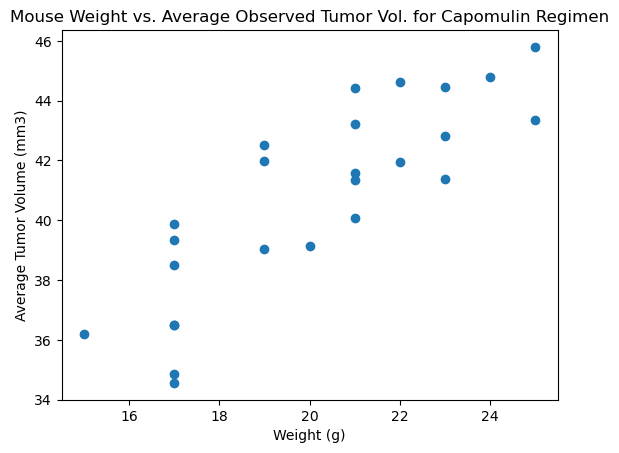

In [136]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_mouse = clean_df.loc[clean_df['Drug Regimen']=="Capomulin"].groupby("Mouse ID")
average_tumor_vol = capomulin_mouse["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_mouse["Weight (g)"].mean()
plt.scatter(mouse_weight,average_tumor_vol)
plt.title("Mouse Weight vs. Average Observed Tumor Vol. for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


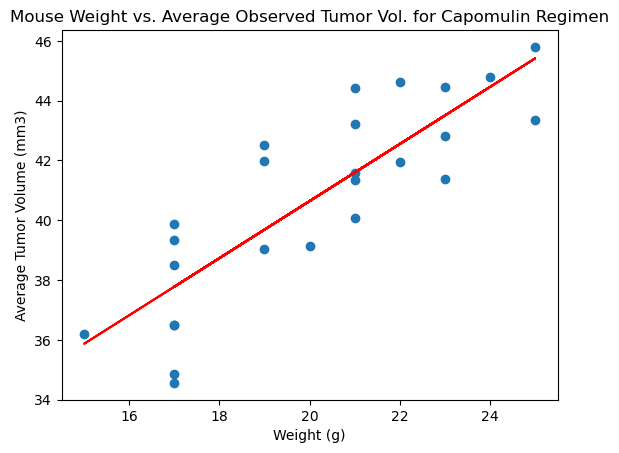

In [137]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(mouse_weight,average_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight,average_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,average_tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.title("Mouse Weight vs. Average Observed Tumor Vol. for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()